In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

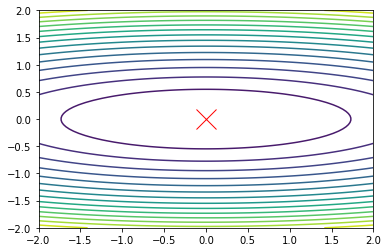

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

1. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newtons-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

## <font color=blue> Problem 1) Question 1.
    
1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

In [34]:
def get_contour_coords():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
    return (x,y)

def get_contour_grad(x, y):  # Gradient (derivative) of the objective function
    x_grad = 2*x 
    y_grad = 20*y
    return x_grad, y_grad

In [35]:
def gradient_descent(eta, x, y, get_grad, epochs):
    results = [[x,y]]
    for i in range(epochs):
        x -= eta * get_grad(x, y)[0]
        y -= eta * get_grad(x, y)[1]
        results.append([float(x), float(y)])
    return results

def plot_results(results,eta,which):
    
    print(results[-1])
    x_grad = [r[0] for r in results]
    y_grad = [r[1] for r in results]

    ## plot the contours
    plt.figure(figsize=(12.5,12.5))
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
    
    ## plot the final point
    plt.scatter(*results[-1],  s=300, facecolors='none', edgecolors='r',linewidths=2)
    
    ## plot the gradient
    plt.plot(x_grad,y_grad,"o-",c="blue", alpha=0.25) 
    
    plt.savefig("hw9_figs/%s" % which)
    plt.show()

[0.034263614150759805, 0.03059043982385]


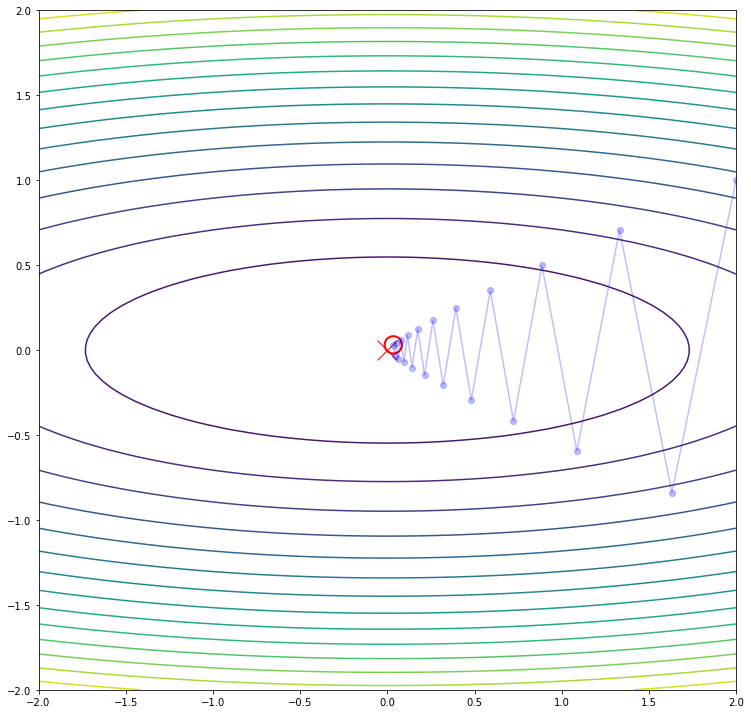

In [8]:
eta = 0.092
results = gradient_descent(eta=eta, x=2, y=1, get_grad=get_contour_grad, epochs=20)
plot_results(results,eta,which="Q1pt1_good_lr")

[0.019835358042352216, 3.207135472212838]


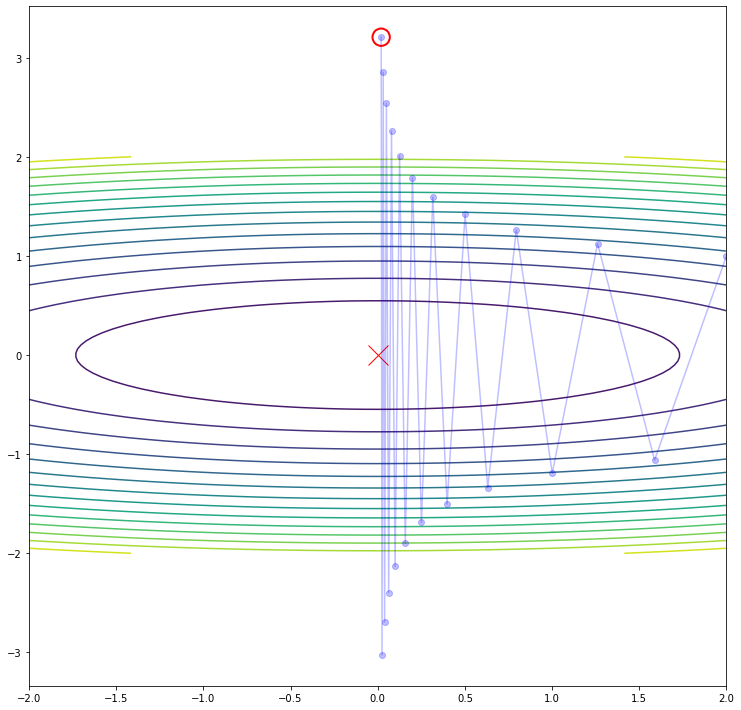

In [6]:
eta=0.103
results = gradient_descent(eta=eta, x=2, y=1, get_grad=get_contour_grad, epochs=20)
plot_results(results,eta,which="Q1pt1_diverging_lr")

## <font color=blue> Problem 1) Question 3.
    
Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

In [9]:
import numpy as np
import torch
# from mpl_toolkits import mplot3d
# from d2l import torch as d2l
import matplotlib.pyplot as plt

In [10]:
def get_contour_coords():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20) 
    return (x,y)

def get_contour_grad(x, y):  # Gradient (derivative) of the objective function
    x_grad = 2*x 
    y_grad = 20*y
    return x_grad, y_grad

def get_contour_z(x,y):
    return x**2 + 10*y**2

In [11]:
def get_momentum(x1, x2, v1, v2):
    v1 = momentum * v1 + 2*x1
    v2 = momentum * v2 + 20*x2
    return x1 - learning_rate * v1, x2 - learning_rate * v2, v1, v2

def gradient_descent(eta, x, y, get_grad, epochs):
    results = [[x,y]]
    for i in range(epochs):
        x -= eta * get_grad(x, y)[0]
        y -= eta * get_grad(x, y)[1]
        results.append([float(x), float(y)])
    return results

def gradient_descent_with_momentum(eta, beta, x, y, get_grad, epochs):
    
    results = [[x,y]]
    v_x, v_y = 0, 0

    for i in range(epochs):
        g_x = get_grad(x, y)[0]
        v_x = beta * v_x + g_x
        x = x - eta * v_x
        
        g_y = get_grad(x, y)[1]
        v_y = beta * v_y + g_y
        y = y - eta * v_y
        
        results.append([float(x), float(y)])
        
    return results

In [12]:
def drange(x, y, jump):
    stuff = []
    while x < y:
        x = round(x,8)
        stuff.append (x)
        x += jump
    return(stuff)

## Find learning rate that converges in less than 20 steps.

In [ ]:
steps = 20
options = drange(0.00665, 0.00669, 0.0000005)

best = 100
for possible in options:
    beta = 0.9
    steps = 20
    res = gradient_descent_with_momentum(eta=possible, beta=beta, x=2, y=1, 
                                         get_grad=get_contour_grad, epochs=steps)
    curr = abs((res[-1][0] + res[-1][1]) /2)
    if curr <= best:
        best = curr
        my_eta = possible
print("best eta:",my_eta, "delta:",best)

In [ ]:
eta = my_eta
beta = 0.9
steps = 20

res = gradient_descent_with_momentum(eta=eta, beta=beta, x=2, y=1, get_grad=get_contour_grad, epochs=steps)
plot_results(res,eta,which="Q3pt1_20steps")

## Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

In [ ]:
steps = 100

## Get largest AND smallest within 0.000001 ...

options = drange(0.000001, 0.5, 0.000005)
print(len(options))
delta = 0.0001
goodies = []

for possible in options:
    beta = 0.9
    steps = 20
    res = gradient_descent_with_momentum(eta=possible, beta=beta, x=2, y=1, 
                                         get_grad=get_contour_grad, epochs=steps)
    curr = abs((res[-1][0] + res[-1][1])/2)
    if curr <= delta:
        goodies.append(possible)

In [ ]:
goodies

In [ ]:
smallest_eta = goodies[0]
biggest_eta = goodies[-1]

In [ ]:
print("best (smallest) eta:",smallest_eta)

eta = smallest_eta
beta = 0.9
steps = 100

res = gradient_descent_with_momentum(eta=eta, beta=beta, x=2, y=1, get_grad=get_contour_grad, epochs=steps)
plot_results(res,eta,which="Q3pt2_100steps_small_eta")

In [ ]:
print("best (smallest) eta:",biggest_eta)

eta = biggest_eta
beta = 0.9
steps = 100

res = gradient_descent_with_momentum(eta=eta, beta=beta, x=2, y=1, get_grad=get_contour_grad, epochs=steps)
plot_results(res,eta,which="Q3pt3_100steps_big_eta")

## <font color=blue> Problem 1) Question 4.
    
Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

In [32]:
import math

def gradient_descent(eta, x, y, get_grad, epochs):
    results = [[x,y]]
    for i in range(epochs):
        x -= eta * get_grad(x, y)[0]
        y -= eta * get_grad(x, y)[1]
        results.append([float(x), float(y)])
    return results

def gradient_descent_with_adam(epsilon, eta, beta_1, beta_2, x, y, get_grad, epochs):
    
    results = [[x,y]]
    v_x, v_y = 0, 0
    s_x, s_y = 0, 0


    for i in range(epochs):
        g_x = get_grad(x, y)[0]
        
        v_x = beta_1 * v_x + g_x * (1-beta_1)
        v_x = v_x / (1-beta_1)
        
        s_x = beta_2 * s_x + g_x**2 * (1-beta_2)
        s_x = s_x / (1-beta_2)
        
        g_x = (eta * v_x) / (math.sqrt(s_x) + epsilon)

        x = x - g_x
        
        
        
        
        g_y = get_grad(x, y)[1]
        
        v_y = beta_1 * v_y + g_y * (1-beta_1)
        v_y = v_y / (1-beta_1)
        
        s_y = beta_2 * s_y + g_y**2 * (1-beta_2)
        s_y = s_y / (1-beta_2)
        
        g_y = (eta * v_y) / (math.sqrt(s_y) + epsilon)

        y = y - g_y
        
        results.append([float(x), float(y)])
        
    return results

In [ ]:
import math

def gradient_descent(eta, x, y, get_grad, epochs):
    results = [[x,y]]
    for i in range(epochs):
        x -= eta * get_grad(x, y)[0]
        y -= eta * get_grad(x, y)[1]
        results.append([float(x), float(y)])
    return results

def gradient_descent_with_adam(epsilon, eta, beta_1, beta_2, x, y, get_grad, epochs):
    
    results = [[x,y]]
    v_x, v_y = 0, 0
    s_x, s_y = 0, 0
    
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]

    for i in range(epochs):
        g_x = get_grad(x, y)[0]
        
        v_x = beta_1 * v_x + g_x * (1-beta_1)
        v_x = v_x / (1-beta_1)
        
        s_x = beta_2 * s_x + g_x**2 * (1-beta_2)
        s_x = s_x / (1-beta_2)
        
        g_x = (eta * v_x) / (math.sqrt(s_x) + epsilon)

        x = x - g_x
        
        
        
        
        g_y = get_grad(x, y)[1]
        
        v_y = beta_1 * v_y + g_y * (1-beta_1)
        v_y = v_y / (1-beta_1)
        
        s_y = beta_2 * s_y + g_y**2 * (1-beta_2)
        s_y = s_y / (1-beta_2)
        
        g_y = (eta * v_y) / (math.sqrt(s_y) + epsilon)

        y = y - g_y
        
        results.append([float(x), float(y)])
        
    return results

In [48]:
epsilon = 0.000001
eta = 0.001
beta_1 = 0.9
beta_2 = 0.999
x=2
y=1
epochs = 100

res = gradient_descent_with_adam(epsilon, eta, beta_1, beta_2, x, y, get_contour_grad, epochs)

[1.9985564582441544, 0.9985564808792066]


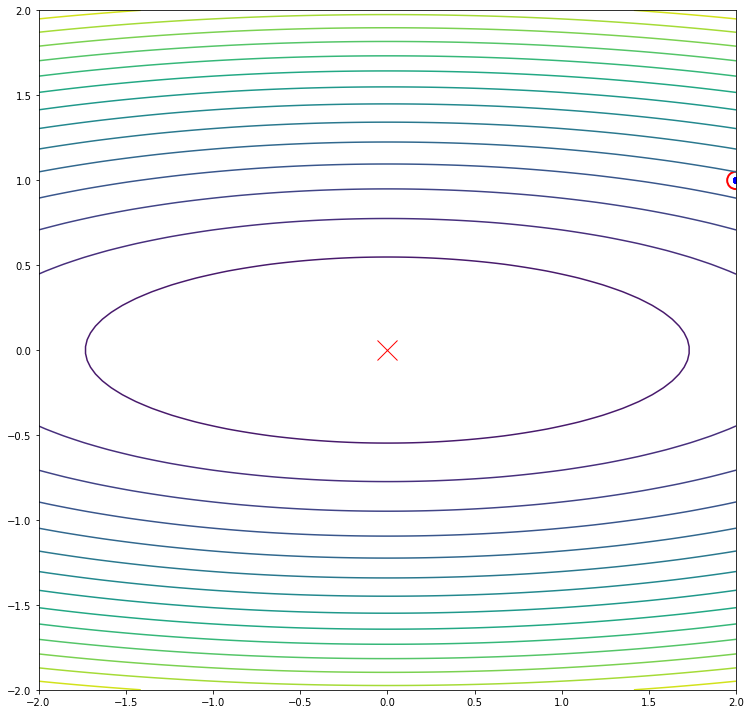

In [49]:
plot_results(res,eta,which="Q4pt1_how_many_steps")